<font size=5 color="blue">

### <center> Convolutional Neural Networks</center>

<font size=5 color="blue">

Digital Image Processing
    

<font size=4>

[Classical book, Gonzalez](./literature/3D-Segmentation-AutonomousDriving_2020.pdf)
- All about Digital Image Processing, including pattern recognition and image segmentation
    
<img src='images/Digital-Image-Procesing.jpg' style="width: 300px;"/>

<font size=5 color="blue">

Pattern recognition in images through convolutions (in the 60's)
    

<font size=4 color="black">
    
[Pattern recognition](./literature/pattern-recognition_1962.pdf)

<font size=4 color='black'>

Filters (kernels) for pattern recognition

<img src='./images/Filters.gif' style="width: 400px;"/>


<font size=5 color='blue'>

Digital Image Processing: spatial filtering using a kernel

<img src='images/spatial-filtering.gif' style="width: 800px;"/>

<font size=4 color='blue'>
    
[What is OpenCV](https://es.wikipedia.org/wiki/OpenCV)
$$ $$
[OpenCV](https://pypi.org/project/opencv-python/)

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as img

<class 'numpy.ndarray'>


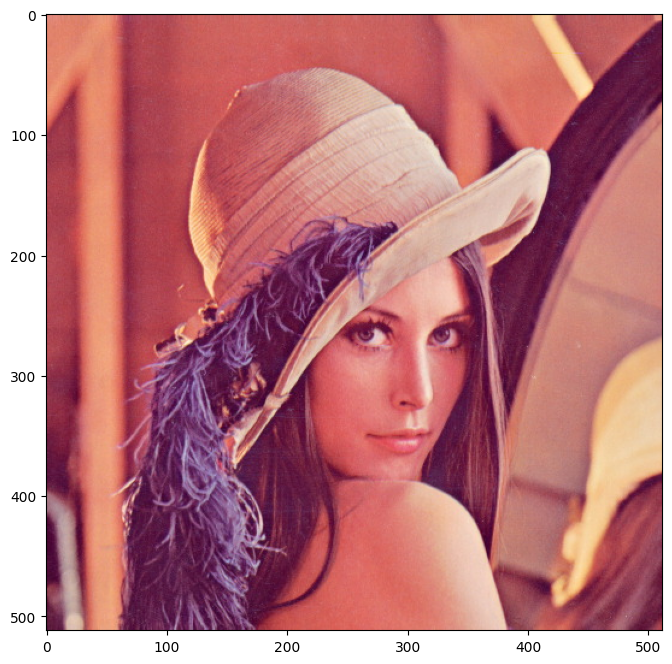

In [ ]:
import cv2

plt.figure(figsize=(20,8))

#lena is a classical image in Digital Image Processing
image = img.imread('/content/lena.jpg')
print(type(image))
plt.imshow(image)

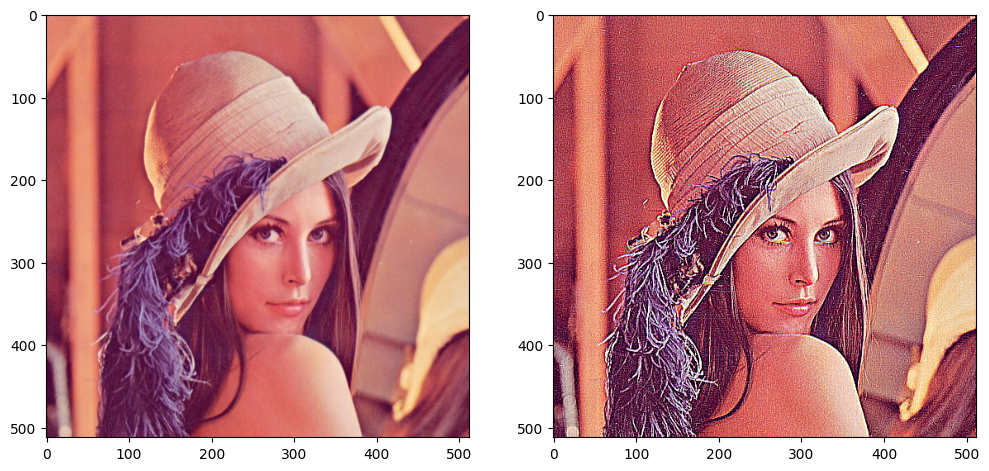

In [ ]:
#Image intensity transformation through stpatial filtering using a kernel

plt.figure(figsize=(12,6))

kernel_1 = np.array([[-1,-1,-1],
                     [-1, 9,-1],
                     [-1,-1,-1]])
sharpened_1 = cv2.filter2D(image, -1, kernel_1)

#Plotting the original image
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
#Plotting the transformed image
plt.imshow(sharpened_1)

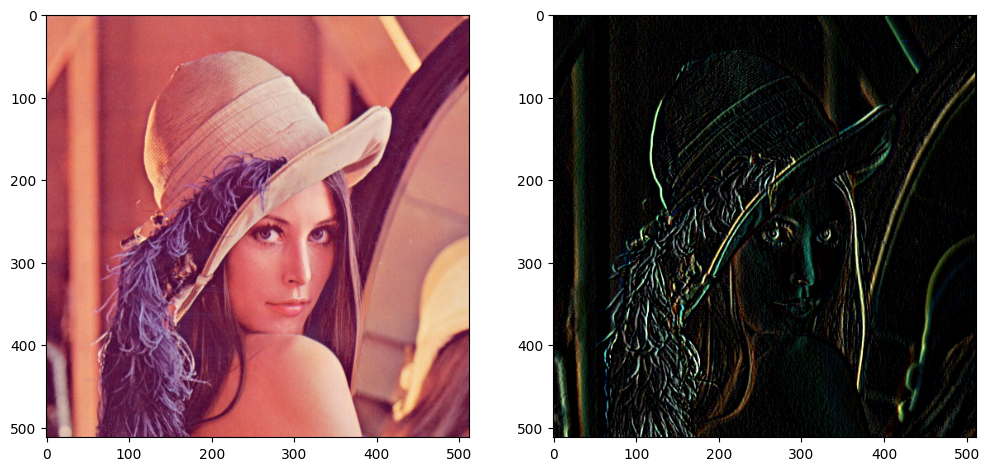

In [ ]:
#Prewitt mask 0 degree

plt.figure(figsize=(12,6))

kernel_1 = np.array([[-1, 1, 1],
                     [-1,-2, 1],
                     [-1, 1, 1]])
sharpened_1 = cv2.filter2D(image, -1, kernel_1)

#Plotting the original image
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
#Plotting the transformed image
plt.imshow(sharpened_1)

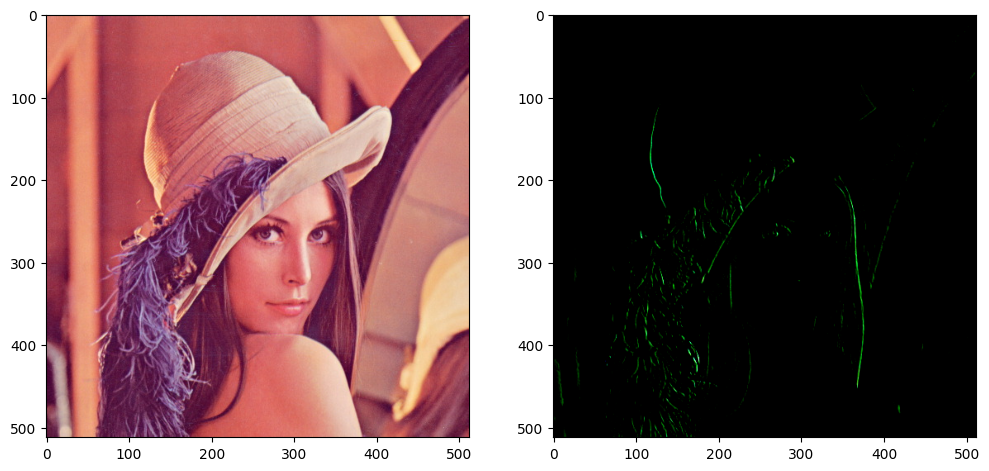

In [ ]:
#Prewit mask 45 degree
plt.figure(figsize=(12,6))

kernel_1 = np.array([[-1, 1, 1],
                     [-1,-2, 1],
                     [-1,-1, 1]])
sharpened_1 = cv2.filter2D(image, -1, kernel_1)

#Plotting the original image
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
#Plotting the transformed image
plt.imshow(sharpened_1)

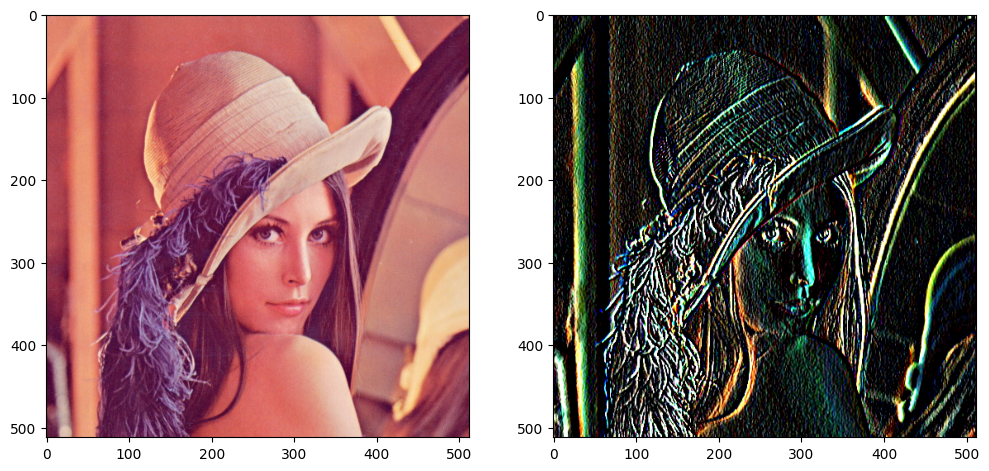

In [ ]:
# Kirsch mark 0 degree
plt.figure(figsize=(12,6))

kernel_1 = np.array([[-3,-3, 5],
                     [-3, 0, 5],
                     [-3,-3, 5]])
sharpened_1 = cv2.filter2D(image, -1, kernel_1)
#Plotting the original image
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
#Plotting the transformed image
plt.imshow(sharpened_1)

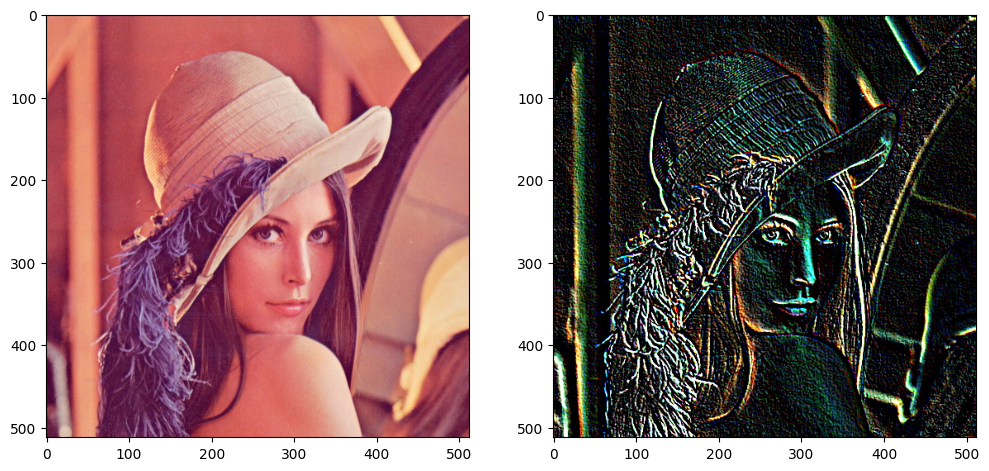

In [ ]:
#Kirsch mask 45 degree

plt.figure(figsize=(12,6))

kernel_1 = np.array([[-3, 5, 5],
                     [-3, 0, 5],
                     [-3,-3,-3]])
sharpened_1 = cv2.filter2D(image, -1, kernel_1)

#Plotting the original image
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
#Plotting the transformed image
plt.imshow(sharpened_1)

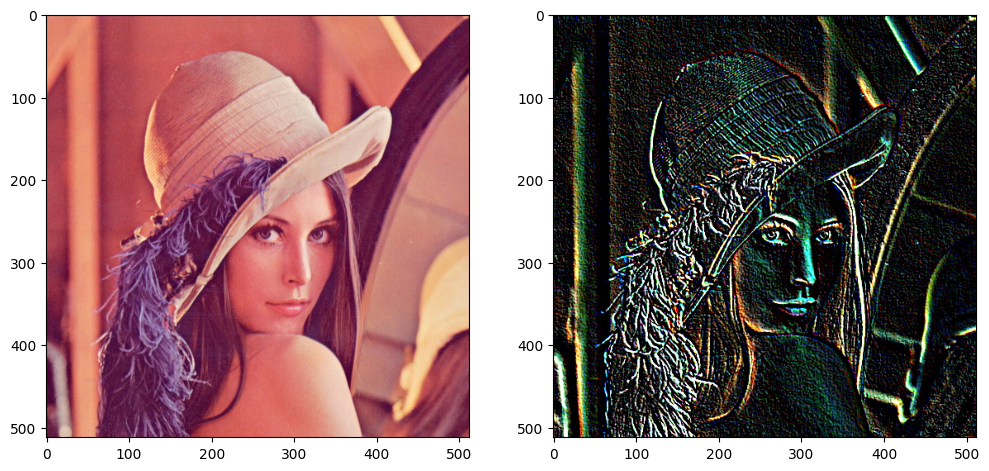

In [ ]:
# Robinson "3-level" mask, 0 degree
plt.figure(figsize=(12,6))

kernel_2 = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])

sharpened_2 = cv2.filter2D(image, -1, kernel_2)

#Plotting the original image
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
#Plotting the transformed image
plt.imshow(sharpened_1)

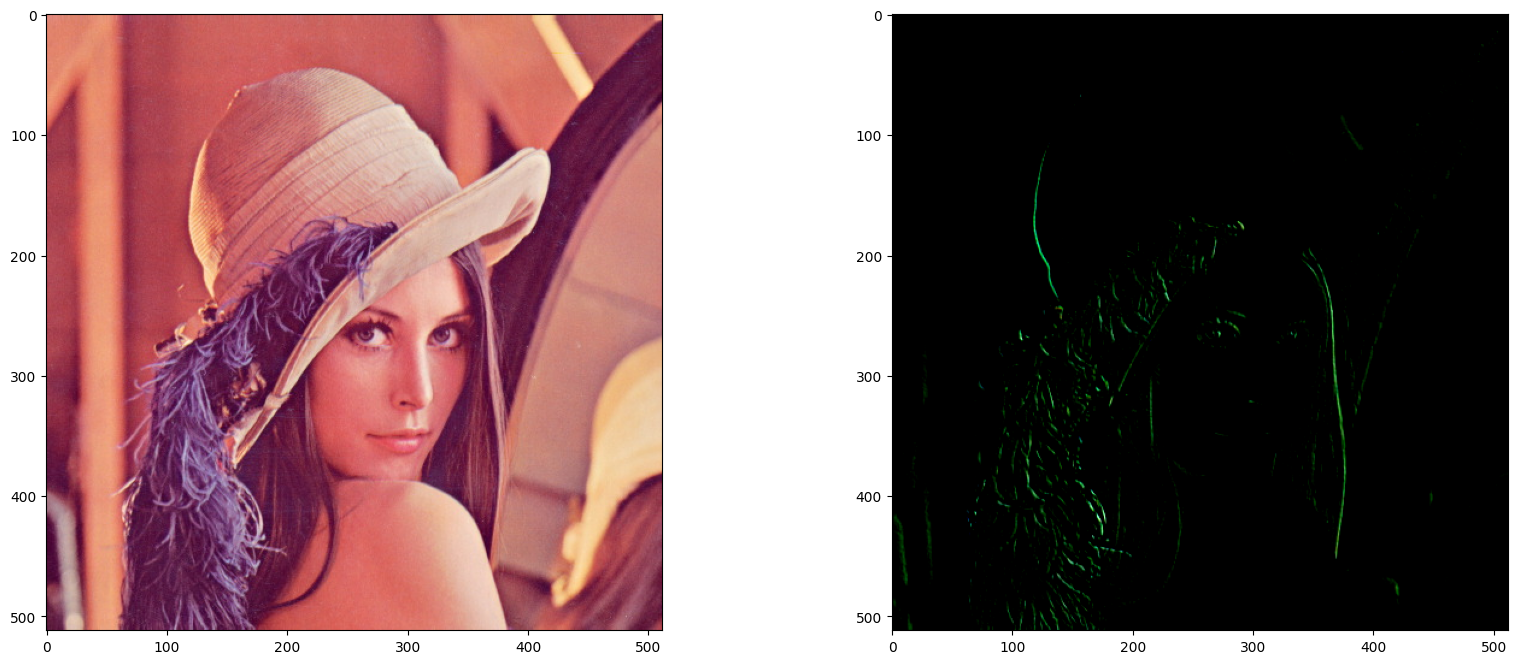

In [ ]:
# Robinson "3-level" mask, 45 degree
plt.figure(figsize=(20,8))

kernel_2 = np.array([[0,  0, 1],
                     [-1, 0, 1],
                     [-1,-1, 0]])

sharpened_1 = cv2.filter2D(image, -1, kernel_2)

#Plotting the original image
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
#Plotting the transformed image
plt.imshow(sharpened_1)

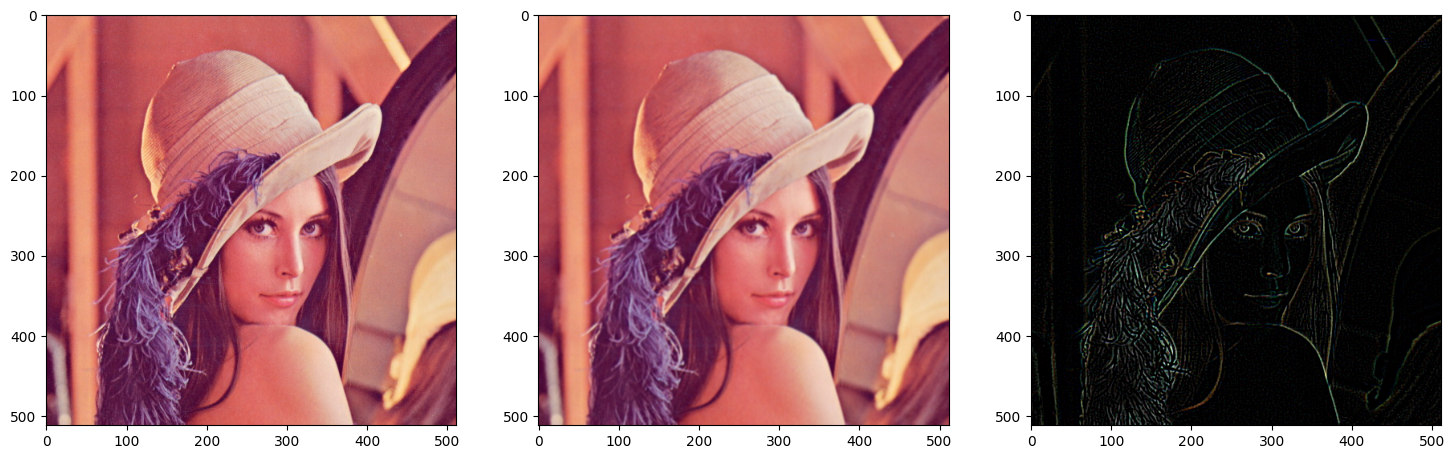

In [ ]:
#Detecting image edges using a Laplace operator
#after smoothing the image, to decrease the noise, using a Gaussian operator

plt.figure(figsize=(18,6))

ddepth = cv2.CV_16S
kernel_size = 3


#Decreasing image noise by applying a Gaussian operator
smoothed_image = cv2.GaussianBlur(image, (3, 3), 0)

#Finding image borders using a Laplace operator
sharped_image = cv2.Laplacian(smoothed_image, ddepth, ksize=kernel_size)

#Plotting the original image
plt.subplot(1, 3, 1)
plt.imshow(image)

#Ploting the smoothed image using a Gaussian operator
plt.subplot(1, 3, 2)
plt.imshow(smoothed_image)

#Plotting the image generated after applying the Laplace operator
plt.subplot(1, 3, 3)
plt.imshow(sharped_image)


<font size=5 color="blue">

## <center>Deep Learning</center>

<font size=5 color="blue">

### <center> Convolutional Neural Networks (CNN)</center>

<font size=4 color="black">
    
Given the functions *f* and *g* over the finite range [0,t], their convolution is given by:
    
$$  c=(f*g)(t) = \int_0^1 f(\tau)g(t-\tau) d\tau$$
    
   $c$ convolution output function $$ $$ $f$ original input image $$ $$
   $g$ function that is shifted over the input function $$ $$
   $t$ variable representing range of shifting $$ $$
   $\tau$ shifting against t
    

<font size=5 color="blue">

A simple example of convolution  

<font size=4 color="black">

Definition of the functions $f$ and $g$

In [ ]:

f = lambda t: np.maximum(0, 1-abs(t))
g = lambda t: (t>0) * np.exp(-2*t)
g0 = lambda tau: g(0-tau)


In [ ]:
Fs = 50  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples

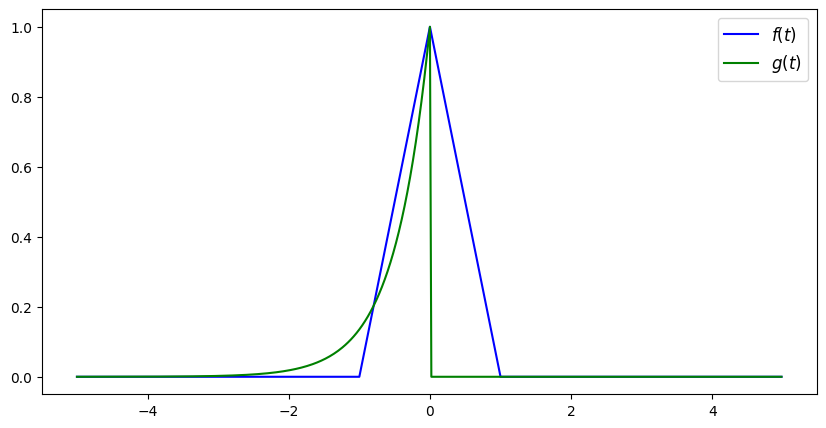

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(t, f(t), color='blue', label='$f(t)$')
plt.plot(t, g0(t), color='green', label='$g(t)$')
plt.legend(['$f(t)$', '$g(t)$'], loc='upper right', fontsize='large')


<font size=4 color="black">

Convolution of $f$ and $g$
    
The shaded area is the result of the convolution.

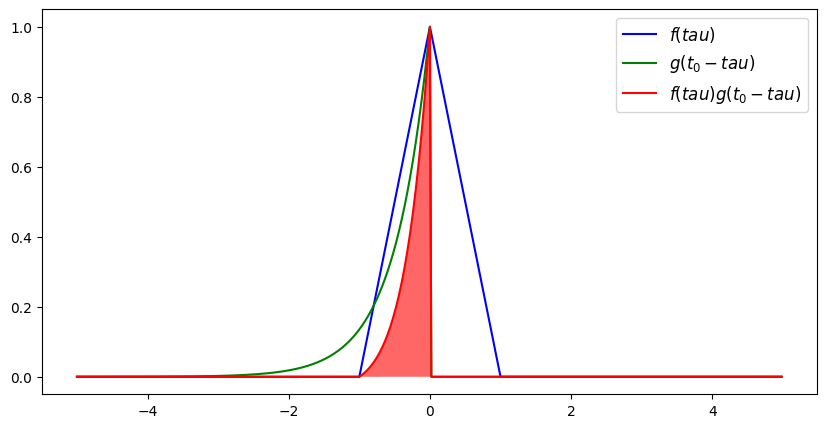

In [ ]:
from IPython.display import HTML
import scipy
from scipy import integrate
import pylab as p


t0 = 0
flipped = lambda tau: g(t0-tau)
product = lambda tau: f(tau)*g(t0-tau)

plt.figure(figsize=(10,5))

plt.plot(t, f(t), color='blue',label=r'$f(\tauu)$')
plt.plot(t, flipped(t), color='green',label=r'$g(t_0-\tau)$')
plt.plot(t, product(t), color='red',label=r'$f(\tau)g(t_0-\tau)$')
p.fill(t, product(t),facecolor='red', alpha=0.6)

plt.legend(['$f(\ttau)$', '$g(t_0-\ttau)$','$f(\ttau)g(t_0-\ttau)$'], loc='upper right', fontsize='large')

# Explicitely calculate the integral, using the Simpson integration rule
display(HTML("Result of the convolution (red shaded area): \
$(f_1*f_2)(t_0=%.0f) = %.2f$" % (t0, scipy.integrate.simps(product(t), t))))

<font size=4 color="black">

Convolution of $f$ and $g$ at different times

In [ ]:
def showConvolution(f, g, t0):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f(tau) * g(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)

    # Create the shifted and flipped function
    f_shift = lambda t: g(t0-t)
    prod = lambda tau: f(tau) * g(t0-tau)

    # Plot the curves
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.plot(t, f(t), color='blue',label=r'$f(\tau)$')
    plt.plot(t, f_shift(t), color='green',label=r'$g(t_0-\tau)$')
    plt.plot(t, prod(t), color='red', label=r'$f(\tau)g(t_0-\tau)$')
    p.fill(t, prod(t),facecolor='red', alpha=0.6)
    plt.legend(['$f(\tau)$', '$g(t_0-\tau)$','$f(\tau)g(t_0-\tau)$'], loc='upper right', fontsize='large')

    # plot the convolution curve
    plt.subplot(212)
    plt.plot(t, convolution, label='$(f*g)(t)$')
    plt.legend(['$(f*g)(t)$'], loc='upper right', fontsize='large')

    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    display(HTML("Result of the convolution (red shaded area): \
    $(f*g)(t_0=%.1f) = %.2f$" % (t0, current_value)))
    plt.plot(t0, current_value, 'ro',markersize=12)  # plot the point


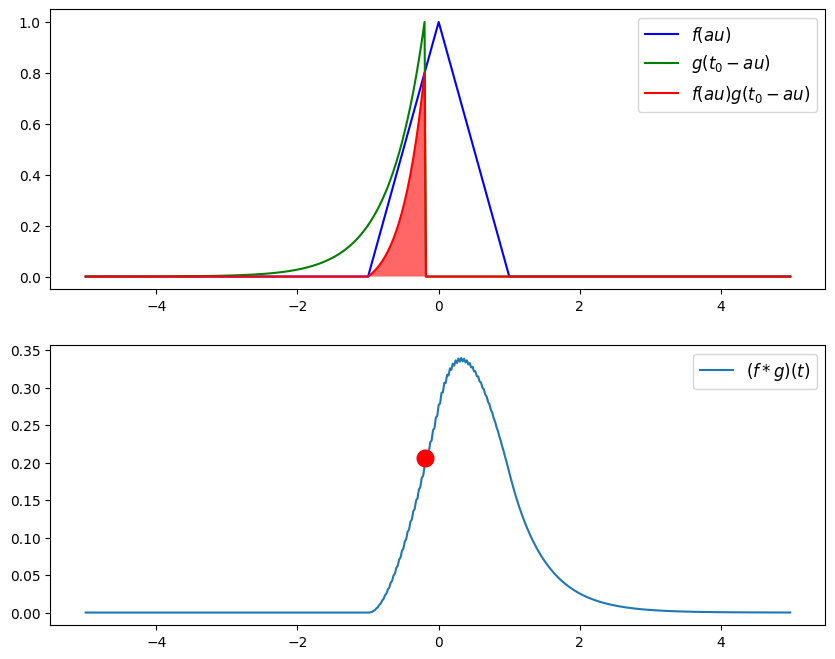

In [ ]:
showConvolution(f,g, -0.2)

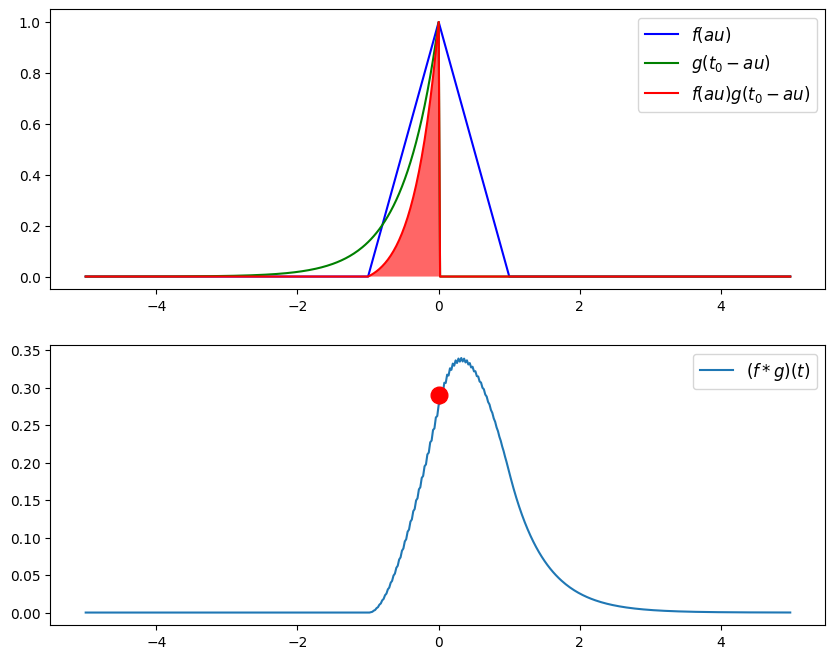

In [ ]:
showConvolution(f,g, 0.0)

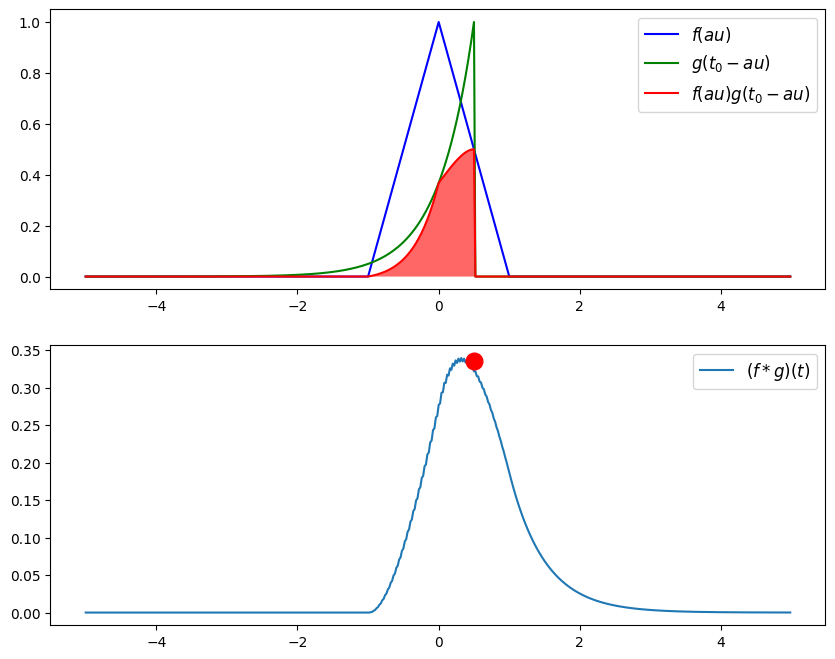

In [ ]:
showConvolution(f,g, 0.5)

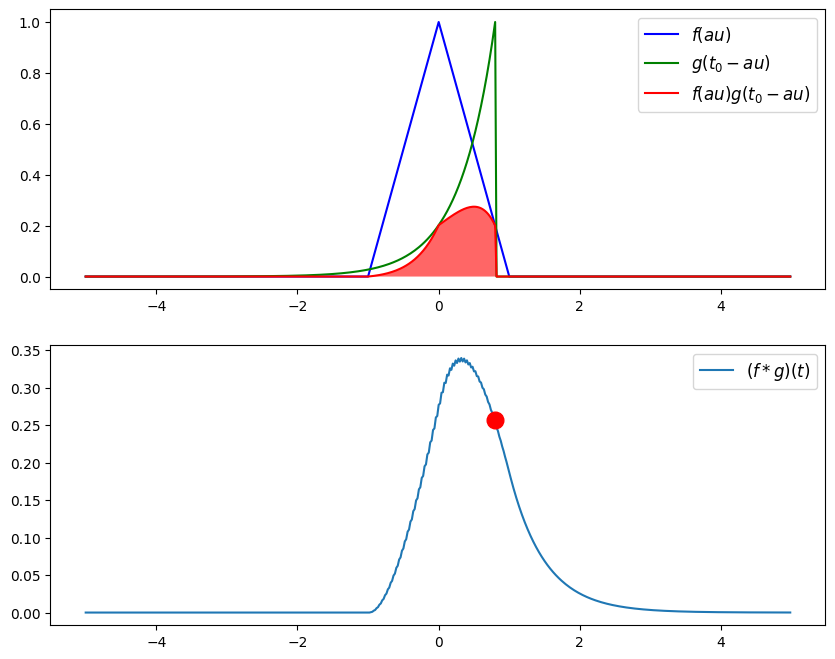

In [ ]:
showConvolution(f,g, 0.8)

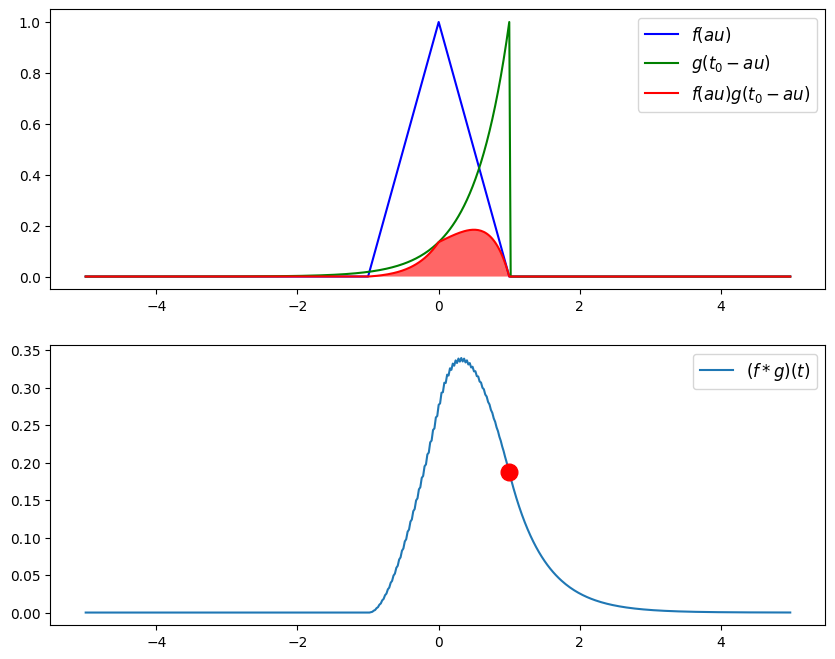

In [ ]:
showConvolution(f,g, 1.0)

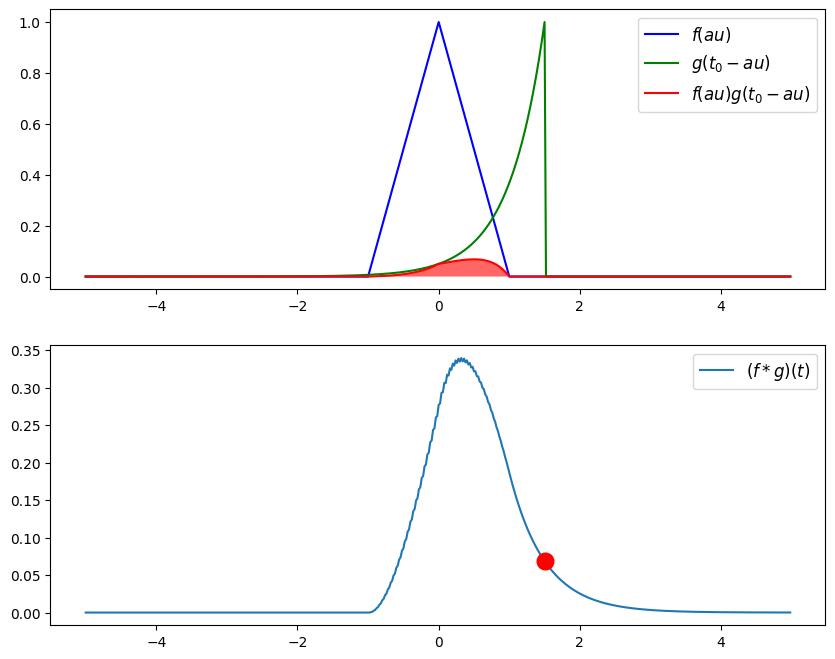

In [ ]:
showConvolution(f,g, 1.5)

<font size=5 color="blue">

Feature extraction using convolution and pooling layers
    

<font size=4 color="black">
    
[CNN, LeCun-90](./literature/lecun-90c.pdf)
    
[CNN, LeCun-Bengio-95](./literature/lecun-bengio-95a.pdf)

<font size=4 color='black'>

If the original image has dimensions *(n, n)*, and the filter has dimensions *(f, f)*, the dimension of the image after the convolution operation is given by the following realtionship:
    
$$[\dfrac{n+2p-f}{s}+1] x [\dfrac{n+2p-f}{s}+1]$$
    
where s and p are the stride and padding values respectively.


<font size=5 color='blue'>

Pooling layer

<font size=4 color='black'>

In general, after applying one or more convolutional layers, it is recommended to reduce the dimensions of the generated images. This is done by pooling neighboring pixels, which reduces the dimension of the image. For example, averaging (Average Pooling) locally the pixel values over a region or de image, or by taking into account only the pixels with the largest values (Max Pooling) in the local region. Sometimes the dimension reduction is more drastic (Global Average Pooling, Global Max Pooling).
    
Example of max pooling:
    
<img src='images/maxpool.gif' style="width: 400px;"/>


<font size=5 color='blue'>

Feed Forward "Full" connected layer

<font size=4 color='black'>

Finally, the ouput of the convolution and pooling layers is the input of a feed forward  "full" connected layer.
    
 <img src="./images/dropout_image.jpeg" width=600 height=600 align = "midle" >   

<font size=5 color='blue'>

Scheme of the Convolutional Neural Network (CNN) correspondig to the Model 1

<font size=4 color='black'>

This is the model that generates a good accuracy in the present notebook.

<font size=5 color='blue'>

 <img src="./images/CNN_IMAGE_V3.png" width=800 height=800 align = "midle" >   

<img src="./images/Picture1.png" width=420 height=420 align = "center" >

<font size=5 color='blue'>
Object Recognition through images using CNN

<img src="./images/cifar-10.png" width=420 height=420 align = "center" >

<font size=5 color='blue'>
CIFAR-10 database

<font size=4 color="black">

[80 million tiny images from internet](./literature/80millionImages.pdf)

The CIFAR-10 and CIFAR-100 are labeled subsets of a 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.


In [ ]:
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("physical_devices--------", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

physical_devices-------- 0


IndexError: ignored

In [ ]:
from platform import python_version
import pkg_resources
def version_library(programa):
    return pkg_resources.get_distribution(programa).version
programas=['numpy', 'tensorflow','pydot', 'matplotlib']

import itertools
from itertools import product
for v in product(iter(programas)):
    print(v[0])
    try:
        print(version_library(v[0]))
    except Exception as e: print(e)

In [ ]:
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pickle

import time

np.random.seed(1)

%matplotlib inline

In [ ]:
print("Numpy version", np.__version__)
print("TensorFlow version", tf.__version__)
print("Keras version", keras.__version__)
print("Pydot version", pydot.__version__)
print("Matplotlib version", matplotlib.__version__)
print("Pickle version", pickle.format_version)
from platform import python_version
print("Python version", python_version())

<font size=5 color='blue'>
Tensorboard with Jupyter Notebooks
    

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/


<font size = 5 color="blue">

CIFAR-10 data is also available from Keras:
    


<font size = 4 color="black">

[CIFAR-10 Keras](https://keras.io/api/datasets/cifar10/)

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print('The type of x_train is', type(x_train))
print('The type of y_train is', type(y_train))

print('\nThe type of x_test is', type(x_test))
print('The type of y_test is', type(y_test))

The type of x_train is <class 'numpy.ndarray'>
The type of y_train is <class 'numpy.ndarray'>

The type of x_test is <class 'numpy.ndarray'>
The type of y_test is <class 'numpy.ndarray'>


In [ ]:
print('The shape of x_train is', x_train.shape)
print('The shape of y_train is', y_train.shape)

print('\nThe shape of x_test is', x_test.shape)
print('The shape of y_test is', y_test.shape)

The shape of x_train is (50000, 32, 32, 3)
The shape of y_train is (50000, 1)

The shape of x_test is (10000, 32, 32, 3)
The shape of y_test is (10000, 1)


<font size=5 color="blue">

Analyzing the data extracted from CIFAR-10

<font size=5 color="blue">
    
View a sample from the data sets

<font size=4 color="black">
    
The input for a sample of the data sets is an array, where each value is the value of a single pixel.

In [ ]:
sample = 0
print("The features of a training sample \n \n", x_train[sample][:1])

<font size=4 color="black">
    
Each value of X in the example is between 0 and 255, they are not normalized.

In [ ]:
# We define a dictionary to associate the class number to a class name.

dic = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
       5: 'dog', 6: 'frog', 7:'horse', 8: 'ship', 9: 'truck'}

<font size=5 color="blue">
    
Showing the image and label (variable y) of any sample

In [ ]:
plt.imshow(x_train[sample]);

print("\nThe y value of the first training sample is",np.squeeze(y_train[sample]))
print("It correspons to a", dic[int(np.squeeze(y_train[sample]))])

<font size=5 color="blue">

Features (X values) normalization


<font size=4 color="black">
To normalize x values, we divide them by 255

In [ ]:
train_x = x_train/255
test_x = x_test/255

<font size=4 color="black">    

Now the pixel values are between 0 and 1.

In [ ]:
train_x[sample][:1]

In [ ]:
plt.imshow(train_x[sample])

In [ ]:
y_train[:1]

<font size=5 color='blue'>
One-hot encoding of the target variable (y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

<font size=4 color='black'>
The target value can have one of ten elements (classes), the digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9).

The sets train_y and test_y are arrays in which each entry contains a digit represented as a integer of 64 bits.
    
We change this representation to a vector following the One-hot encoding
[One-hot encoding](https://en.wikipedia.org/wiki/One-hot).
    
In One-Hot encoding, a digit is represented with a vector that has dimension 10 (because we have 10 classes) with 1.0 in the vector index corresponding to the digit and 0.0 elsewhere in the vector.


In [ ]:
y_train.shape

In [ ]:
y_train.reshape(-1).shape

In [ ]:
train_y = np.eye(10)[y_train.reshape(-1)]
test_y = np.eye(10)[y_test.reshape(-1)]

In [ ]:
print(y_train[0:5])

In [ ]:
train_y[0:5]

<font size=5 color="blue">
    
Viewing one sample from the data set.

In [ ]:
sample = 9

plt.imshow(train_x[sample]);

print('The sample', sample, 'corresponds to a', dic[int(np.argmax(train_y[sample]))])
print("Its one-hot representation is =", train_y[sample])

<font size=4 color="black">
    
In summary, the training and test sample sets have the following dimensions:

In [ ]:
print ("number of training examples = " + str(train_x.shape[0]))
print ("number of test examples = " + str(test_x.shape[0]))
print ("X_train shape: " + str(train_x.shape))
print ("Y_train shape: " + str(train_y.shape))
print ("X_test shape: " + str(test_x.shape))
print ("Y_test shape: " + str(test_y.shape))

<font size=4 color='black'>
    
Keras has two different modes to define the architecture:$$$$

    
1.- The sequential model. It is a sequential stack of layers.

   
2.- The functional API. It is the way to go for defining complex models, such as multi-output models,$$$$ directed acyclic graphs, or models with shared layers.  

    
In the present case, we will use the first mode to build the network architecture.
    
Documentation: [Keras Sequential class](https://keras.io/api/models/sequential/)

<font size=4 color='black'>

[CNN defined in Keras](https://keras.io/api/layers/convolution_layers/)

In [ ]:
#Model 0
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):

    model = Sequential()

    model.add(Conv2D(filters=32,
                     kernel_size=3,
                     padding='same', #After convolution, the final and original images have the same dimension
                     kernel_initializer='glorot_uniform',
                     bias_initializer='zeros',
                     input_shape=input_shape))

    model.add(Activation(activation))
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the output

    model.add(Conv2D(filters=32,
                     kernel_size=3,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     bias_initializer='zeros'))

    model.add(Activation(activation))
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer

    model.add(MaxPooling2D())

    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'glorot_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer

    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'glorot_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer

    model.add(MaxPooling2D())

    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.50))

    model.add(Dense(50, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))
    if batch_normalization:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(0.50))

    model.add(Dense(50, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))
    if batch_normalization:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(0.50))

    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))

    return model


<font size=5 color="blue">

Building the neural network model for the learning system

In [ ]:
one_image = (32, 32, 3)
activation='sigmoid'
num_classes=10
dropout=True
batch_normalization=True

cifar10_model = architecture(one_image,num_classes,activation,dropout,batch_normalization)

<font size=5 color="blue">
    
Graph and summay of the model

<font size=4 color='black'>
The 'plot_model()' function generates a graphic with the layers and their number of input ands output weights.

[Model visualization](https://keras.io/api/utils/model_plotting_utils/#training-history-visualization)
    

In [ ]:
plot_model(cifar10_model, to_file='cifar10_blocks.png', show_shapes=False, rankdir='LR',show_layer_names=False)

In [ ]:
plot_model(cifar10_model, to_file='cifar10_model.png', show_shapes=True, rankdir='TB', show_layer_names=True)

In [ ]:

cifar10_model.summary()

<font size=5 color='blue'>
Optimization method

<font size=3 color="black">
This requires defining the optimization algorithm, the loss function and the metric.
    
In the present case we are using the Stochastic Gradient descent algorithm with learning rate "lr", momentum "momentum",  and without Nesterov acceleration".

The following literature also comments on some other optimization variants of this algorithm; Adagrad, Adadelta, RMStrop and Adam.
    
[Algorithms based on  Stochastic Gradient Descent](./literature/SGD_overview_2016-17.pdf)

<font size=5 color='blue'>
Optimizer

<font size=5 color='blue'>
Stocastic gradient descent(SGD) method.  
<font size=4 color='blue'> $$ $$
    
[Stochastic Gradient Descent](./literature/Stochastic_Gradient_Descent.pdf)

<font size=5 color='blue'>
Using mini-batches.  
$$ $$
<font size=4>
  
[Mini-batch](./literature/Mini-Batch_SVMs_2013.pdf)    

<font size=4 color='black'>
The training samples are divided into mini-batches that have the size batch_size (B). Updates of weights and biases are based on an average of the gradient within each block of B samples.
    
$$ \omega^{(t)} := \omega^{(t-1)} - \alpha \dfrac{1}{B} \sum_{t^1=Bt +1}^{B(t+1)}\dfrac{\partial J(x^{(t^1)},y^{(t^1)},\omega, b)}{\partial \omega}$$

$$ b^{(t)} := b^{(t-1)} - \alpha \dfrac{1}{B} \sum_{t^1=Bt +1}^{B(t+1)}\dfrac{\partial J(x^{(t^1)},y^{(t^1)},\omega, b)}{\partial b}$$

$ \alpha $ represents the learning rate and *t* represents an iteration.
    
This method is specially useful for large sets of training data.
    
[Gradient-Based Training](./literature/Practical_rec_DL_Bengio_2012.pdf)

In [ ]:
learning_rate = 0.015

optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0, nesterov=False)

<font size=5 color='blue'>
The cost (loss) and Metric functions

<font size=4 color="black">
    
The cost function *J* is defined as "categorical_crossentropy"
    
$$ J = \frac{1}{m} \sum_{i=1}^m \sum_{k=0}^{K-1}(y_k^{(i)}*\log{(F_k(x^{(i)})))}$$
    
 where $F_k(x^{(i)})$ is the predicted value and $y_k^{(i)}$ is the target value for the sample *i*; *K* is the number of classes and *m* is the number of samples.    

A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model. You may use any of the loss functions as a metric function. In the present example, we are using "accuracy" as metrics:
    
*Accuracy = Number of correct predictions / Total number of predictions made*
    

Categorical crossentropy will compare the distribution of the predictions (the activations in the output layer, one for each class) with the true distribution, where the probability of the true class is set to 1, and 0 for the other classes.

To put it in a different way, the true class is represented as an encoded vector, and the closer the model’s outputs are to that vector, the lower the loss.
    
Documentation: [keras.compile(...)](https://keras.io/models/model/#compile)

In [ ]:
loss_function = 'categorical_crossentropy'
metric_function = 'accuracy'

<font size=5 color='blue'>
Compiling the model

In [ ]:
cifar10_model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function])

<font size=5 color='blue'>
    
Training the learning system

<font size=5 color='blue'>
    
Shuffle

<font size=4 color='black'>

Shuffling the training data before each epoch has a large effect on the loss associated with the test samples.$$$$ Shuffling the training data, the samples for each mini-batch change with the epoch.
    
To speed up the convergence of weights and biases, it is also possible to fix the samples associated with each mini-batch. Then, the mini-batches will be called randomly in each epoch.  
    

<font size=5 color="blue">

Batch normalization

<font size=4 color="black">
    
[Batch normalization](./literature/Batch-normalization_2015.pdf)

<font size=4 color='black'>
    
Training Deep Neural Networks is complicated by the fact that the input distribution of each layer changes during training, as the parameters of the previous layers change.
    
Batch Normalization allows us to use much higher learning rates and be less careful about initialization, and in some cases eliminates the need for Dropout.

<font size=4 color='black'>
    
Using batch normalization in a layer, the layer normalizes its output using the mean and standard deviation of the current batch of inputs. That is to say, for each channel being normalized, the layer returns (batch - mean(batch)) / (var(batch) + epsilon) * gamma + beta, where:

    epsilon is small constant (configurable as part of the constructor arguments)
    gamma is a learned scaling factor (initialized as 1), which can be disabled by passing scale=False to the constructor.
    beta is a learned offset factor (initialized as 0), which can be disabled by passing center=False to the constructor.


<font size=4 color='black'>
    
Importantly, batch normalization works differently during training and during inference.
    
[Batch Normalization in Keras](https://keras.io/api/layers/normalization_layers/batch_normalization/)

<font size=4 color="black">
    
Documentation: [keras.fit(...)](https://keras.io/models/model/#fit)

In [ ]:
#10 % of the training data will be used to validate the training
start_time = time.time()

validation_portion = 0.1
batch_size=128
num_epochs = 100

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="logs/cifar10", histogram_freq=1)

history = cifar10_model.fit(x=train_x, y=train_y, epochs=num_epochs, batch_size=batch_size, \
                            validation_split=validation_portion, shuffle=True,
                            callbacks=[tensorboard_callback], verbose=1)

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

<font size=5 color='blue'>
Saving model to disk

In [ ]:
cifar10_model.save('CNN_Cifar10Model-000.h5')

<font size=5 color="blue">
Graph of cost functions as a function of epoch

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Lr = 0.015, FF_Dropout: Inp = 0.50, hl_1 = 0.50, hl_2 = 0.50')
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch',size=16)
plt.legend(['Train', 'Validation'], loc='upper right', fontsize=16)
plt.show()

<font size=5 color="blue">
Graph of accuracy functions as a function of epoch

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('Lr = 0.015, FF_Dropout: Inp = 0.50, hl1 = 0.50, hl2 = 0.50, \n Acc=0.755')
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='lower right', fontsize=16)
plt.show()

<font size = 5 color='blue'>
Loss and accuracy evaluation

<font size= 4 color='black'>    
After training the network, the loss and accuracy functions are evaluated using the test samples (test_x, test_y).    

    
[Method evaluate in Keras](https://keras.io/models/model/)

In [ ]:
evaluations = cifar10_model.evaluate(x = test_x, y = test_y)

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))


In [ ]:
# Evaluation using the first 100 samples of the test set

evaluations = cifar10_model.evaluate(x = test_x[:100], y = test_y[:100])

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))


<font size = 5 color='blue'>
<center>Image prediction

<font size= 4 color='black'>    
The trained learning system can predict the object content of an image. For example, we take an image of the test dataset (test_x, test_y).
    
[Method predict in Keras](https://keras.io/models/model/)

In [ ]:
# Predicting the image associated to the each sample in the test set (X_test)
predictions = cifar10_model.predict(test_x)

In [ ]:
sample = 31

In [ ]:
# Predicting the image associated to the sample
# np.argmax returns the index of the maximum value

prediction = np.argmax(predictions[sample])

print('For the sample number', sample, 'the prediction is a(n)', dic[prediction])

<font size=4 color="black">
Displaying the image associated (not predicted!) to this sample.

In [ ]:

plt.imshow(test_x[sample].reshape((32, 32, 3)))

print('the sample', sample, 'corresponds to a', dic[int(np.argmax(test_y[sample]))])


<font size = 4 color="black">
    
The next function finds the number of samples where the network made an incorrect prediction in a region of the test dataset. For example, in the first 40 samples from this dataset.

In [ ]:

mislabeled_images = []

for i in range(len(test_x[:40])):

    if np.argmax(cifar10_model.predict(test_x)[i]) != np.argmax(test_y[i]):

        mislabeled_images.append(i)


print(mislabeled_images)

<font size=5, color=blue>
    Data analysis

<font size=5, color=blue>
    With NETRON
$$ $$
<font size=4, color='black'>
This APP is excelent to extract the kernel values. To use it, read carefully the following blog. $$ $$

[How to extract kernel values in CNN using NETRON](https://shivang-ahd.medium.com/how-to-extract-kernel-values-in-cnn-using-netron-and-generate-feature-maps-82cdb6020bb0)

<font size=5 color='black'>
Run the application! $$ $$
    
<font size=4 color='blue'>
    
[NETRON](https://netron.app/)

<font size=5, color=blue>
    With Tensorboard

In [ ]:
%tensorboard --logdir logs/cifar10

In [ ]:
def plot_images(lena, image, kernel):
    plt.figure(figsize=(25,15))

    ax1 = plt.subplot(2,3,1)
    ax2 = plt.subplot(2,3,2)
    ax3 = plt.subplot(2,3,3)
    ax4 = plt.subplot(2,3,4)
    ax5 = plt.subplot(2,3,5)
    ax6 = plt.subplot(2,3,6)

    lena_R = lena[:,:,0]
    lena_G = lena[:,:,1]
    lena_B = lena[:,:,2]


    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]

    l_sharpened_R = cv2.filter2D(lena_R, -1, kernel)
    l_sharpened_G = cv2.filter2D(lena_G, -1, kernel)
    l_sharpened_B = cv2.filter2D(lena_B, -1, kernel)

    i_sharpened_R = cv2.filter2D(image_R, -1, kernel)
    i_sharpened_G = cv2.filter2D(image_G, -1, kernel)
    i_sharpened_B = cv2.filter2D(image_B, -1, kernel)

    ax1.imshow(l_sharpened_R, cmap='gray')
    ax2.imshow(l_sharpened_G, cmap='gray')
    ax3.imshow(l_sharpened_B, cmap='gray')
    ax4.imshow(i_sharpened_R, cmap='gray')
    ax5.imshow(i_sharpened_G, cmap='gray')
    ax6.imshow(i_sharpened_B, cmap='gray')

    return

In [ ]:
#Loading the kernels from the files saved with NETRON
kernel_0 = np.load('conv2d_kernel_0.npy')
print("kernel type:", type(kernel_0))
print("kernel shape:", kernel_0.shape)
print("kernel_0[2][2] = ")
print(kernel_0[2][2])

In [ ]:
plt.figure(figsize=(16,6))

image = test_x[sample].reshape((32, 32,3))
print(type(image), image.shape)
plt.imshow(image)

In [ ]:
image_R = image[:,:,0]
image_G = image[:,:,1]
image_B = image[:,:,2]

In [ ]:
plt.figure(figsize=(16,6))

ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

ax1.imshow(image_R, cmap='gray')
ax2.imshow(image_G, cmap='gray')
ax3.imshow(image_B, cmap='gray')

In [ ]:
plt.figure(figsize=(16,6))
lena = img.imread('images/lena.jpg')
plt.imshow(lena)

In [ ]:
lena_R = lena[:,:,0]
lena_G = lena[:,:,1]
lena_B = lena[:,:,2]

In [ ]:
plt.figure(figsize=(16,6))

ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

ax1.imshow(lena_R, cmap='gray')
ax2.imshow(lena_G, cmap='gray')
ax3.imshow(lena_B, cmap='gray')

In [ ]:

kernel = kernel_0[0][0]
print(kernel)
plot_images(lena,image,kernel)

In [ ]:

kernel = kernel_0[0][1]
print(kernel)
plot_images(lena,image,kernel)

In [ ]:
kernel = kernel_0[0][2]
print(kernel)
plot_images(lena,image,kernel)

In [ ]:
kernel = kernel_0[1][0]
print(kernel)
plot_images(lena,image,kernel)

In [ ]:
kernel= kernel_0[1][1]
print(kernel)
plot_images(lena,image,kernel)

In [ ]:
kernel= kernel_0[1][2]
print(kernel)
plot_images(lena,image,kernel)

In [ ]:
kernel= kernel_0[2][0]
print(kernel)
plot_images(lena,image,kernel)

In [ ]:
kernel= kernel_0[2][1]
print(kernel)
plot_images(lena,image,kernel)

In [ ]:
kernel= kernel_0[2][2]
print(kernel)
plot_images(lena,image,kernel)

<font size=4 color='black'>
    
[Runs summary](Clase-10_figures.odt)

<font size=5, color=blue>
The following command will find and kill the tensorboard process:

<font size=4 >
Keras manages a global state, which it uses to implement the Functional model-building API and to uniquify autogenerated layer names.  
If you are creating many models in a loop, this global state will consume an increasing amount of memory over time, and you may want to clear it. Calling clear_session() releases the global state: this helps avoid clutter from old models and layers, especially when memory is limited.